# Cross sale classification

In [ ]:
## downsampling

## 1. Data validation

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt

In [10]:
## Data import
df=pd.read_csv('totale2.csv')


In [11]:
print(df.shape)
df.head()

(120, 16)


,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p,r_axis,target
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,9.636736e-14,y,supine
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,1.265654e-14,y,supine
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,3.275158e-15,y,supine
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,8.881784e-15,y,lateral R
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,2.570166e-14,y,lateral R


In [12]:
## Check missing data
df.isnull().sum()

BR        0
WL        0
MAV       0
MV        0
STD       0
RMSE      0
Max       0
Min       0
VAR       0
SEN       0
MDF       0
MNF       0
Max_p     0
Min_p     0
r_axis    0
target    0
dtype: int64

## Split categorical and continuos variables

In [13]:
## Categorical variables
df.dtypes

BR        float64
WL        float64
MAV       float64
MV        float64
STD       float64
RMSE      float64
Max       float64
Min       float64
VAR       float64
SEN       float64
MDF       float64
MNF       float64
Max_p     float64
Min_p     float64
r_axis     object
target     object
dtype: object

## Univariate analisys: numerical data

In [14]:
print(len(df.columns))

16


In [17]:
df_num=df.iloc[:,0:(len(df.columns)-2)]



df_num.head()


,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,9.636736e-14
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,1.265654e-14
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,3.275158e-15
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,8.881784e-15
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,2.570166e-14


In [18]:
df_num

,BR,WL,MAV,MV,STD,RMSE,Max,Min,VAR,SEN,MDF,MNF,Max_p,Min_p
0,0.240080,-49.489306,0.016496,-0.016496,0.828765,0.024225,2.856031,-2.129246,-0.016502,10121.076678,50.301781,46.663023,711.235976,9.636736e-14
1,0.220073,0.478272,0.000159,0.000159,0.507935,0.012104,1.034132,-1.496247,0.000160,34.109931,2.920185,18.695023,439.457656,1.265654e-14
2,0.220073,16.022720,0.005343,0.005343,0.531967,0.012163,0.933654,-1.088899,0.005344,1189.987977,17.248101,40.609365,860.553796,3.275158e-15
3,0.260087,-72.349807,0.024117,-0.024117,0.618624,0.017500,1.620029,-1.553317,-0.024125,19177.751270,69.241879,39.344414,526.384057,8.881784e-15
4,0.260087,4.426925,0.001476,0.001476,0.415343,0.011135,0.848615,-0.834289,0.001477,15.765618,1.985297,96.913984,583.295626,2.570166e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.300100,-23.945668,0.007985,-0.007985,0.277522,0.008231,1.030795,-0.963738,-0.007987,1663.695798,20.394214,36.912484,299.056282,1.931788e-14
116,0.260087,9.330342,0.003111,0.003111,0.210104,0.006094,0.563488,-0.757839,0.003112,334.496317,9.144620,45.463654,210.754927,1.332268e-14
117,0.060020,5.913591,0.001971,0.001971,0.331902,0.007434,0.783421,-0.908550,0.001972,171.517668,6.548238,62.681782,373.320709,3.652634e-14
118,0.100033,-2.784492,0.000928,-0.000928,0.213264,0.005937,0.470299,-0.624875,-0.000929,217.126050,7.367599,74.158073,205.519786,1.240674e-14


OUTLIER CORRECTION 

array([[<AxesSubplot:title={'center':'BR'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'MAV'}>,
        <AxesSubplot:title={'center':'MV'}>],
       [<AxesSubplot:title={'center':'STD'}>,
        <AxesSubplot:title={'center':'RMSE'}>,
        <AxesSubplot:title={'center':'Max'}>,
        <AxesSubplot:title={'center':'Min'}>],
       [<AxesSubplot:title={'center':'VAR'}>,
        <AxesSubplot:title={'center':'SEN'}>,
        <AxesSubplot:title={'center':'MDF'}>,
        <AxesSubplot:title={'center':'MNF'}>],
       [<AxesSubplot:title={'center':'Max_p'}>,
        <AxesSubplot:title={'center':'Min_p'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

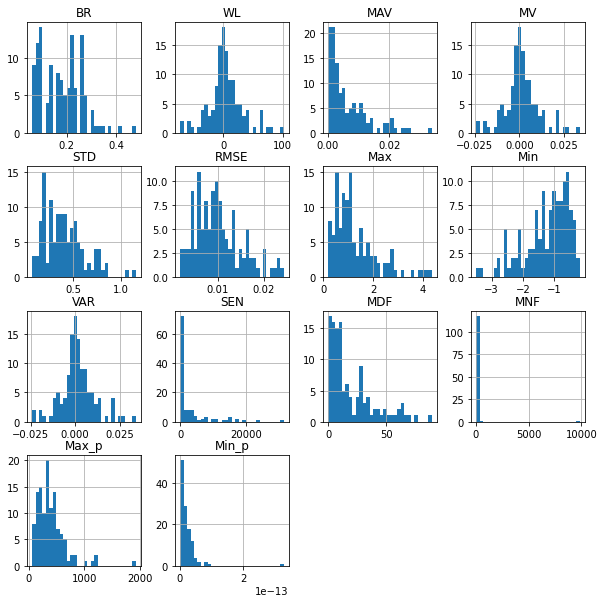

In [19]:
df_num.hist(figsize=(10,10), bins=30)

<AxesSubplot:xlabel='WL'>

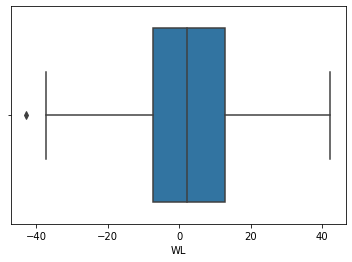

In [20]:

for x in ['WL']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan
sns.boxplot(x=df_num['WL'])

<AxesSubplot:xlabel='Max_p'>

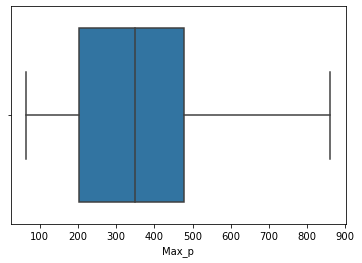

In [21]:
for x in ['Max_p']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['Max_p'])

<AxesSubplot:xlabel='BR'>

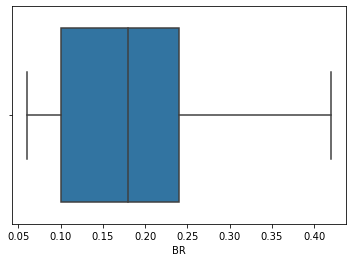

In [22]:
for x in ['BR']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['BR'])

<AxesSubplot:xlabel='MV'>

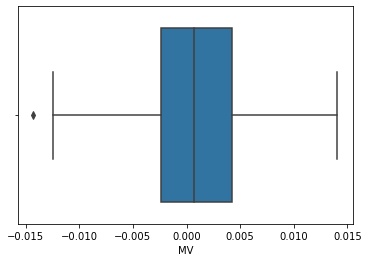

In [23]:
for x in ['MV']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['MV'])

<AxesSubplot:xlabel='VAR'>

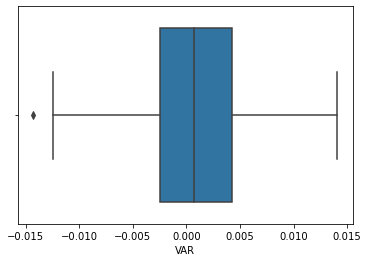

In [24]:
for x in ['VAR']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

sns.boxplot(x=df_num['VAR'])

array([[<AxesSubplot:title={'center':'BR'}>]], dtype=object)

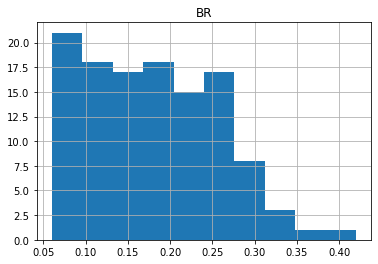

In [25]:
df_num.hist(column="BR")

array([[<AxesSubplot:title={'center':'SEN'}>]], dtype=object)

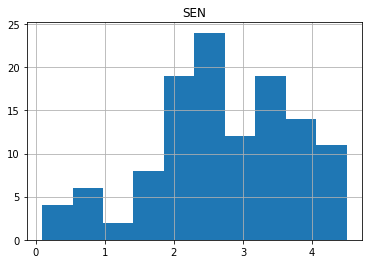

In [26]:
df_num['SEN']=np.log10(df_num["SEN"])


for x in ['SEN']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="SEN")

array([[<AxesSubplot:title={'center':'MNF'}>]], dtype=object)

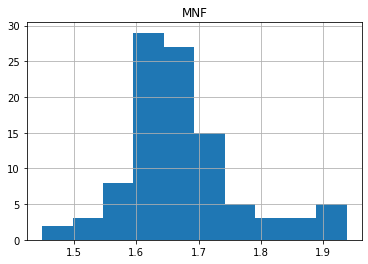

In [27]:
df_num['MNF']=np.log10(df_num["MNF"])


for x in ['MNF']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="MNF")

array([[<AxesSubplot:title={'center':'MDF'}>]], dtype=object)

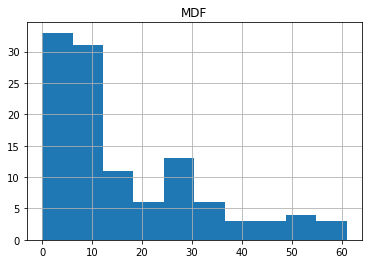

In [28]:



for x in ['MDF']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="MDF")

<AxesSubplot:xlabel='MDF'>

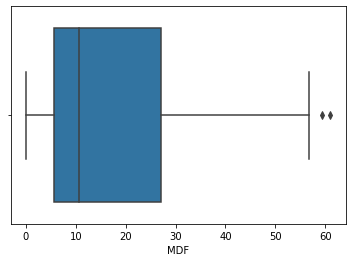

In [29]:
sns.boxplot(x=df_num['MDF'])

array([[<AxesSubplot:title={'center':'Min_p'}>]], dtype=object)

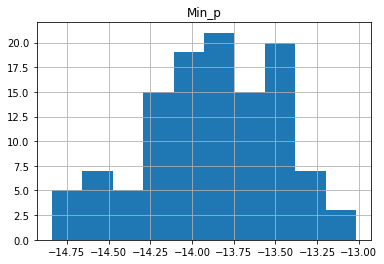

In [30]:
df_num['Min_p']=np.log10(df_num["Min_p"])


for x in ['Min_p']:
    q75,q25 = np.percentile(df_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_num.loc[df_num[x] < min,x] = np.nan
    df_num.loc[df_num[x] > max,x] = np.nan

df_num.hist(column="Min_p")

array([[<AxesSubplot:title={'center':'BR'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'MAV'}>,
        <AxesSubplot:title={'center':'MV'}>],
       [<AxesSubplot:title={'center':'STD'}>,
        <AxesSubplot:title={'center':'RMSE'}>,
        <AxesSubplot:title={'center':'Max'}>,
        <AxesSubplot:title={'center':'Min'}>],
       [<AxesSubplot:title={'center':'VAR'}>,
        <AxesSubplot:title={'center':'SEN'}>,
        <AxesSubplot:title={'center':'MDF'}>,
        <AxesSubplot:title={'center':'MNF'}>],
       [<AxesSubplot:title={'center':'Max_p'}>,
        <AxesSubplot:title={'center':'Min_p'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

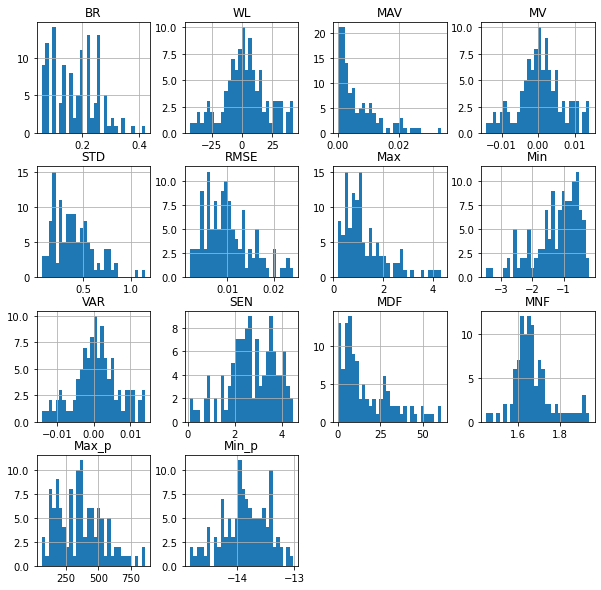

In [31]:


df_num.hist(figsize=(10,10), bins=30)

<AxesSubplot:xlabel='MDF'>

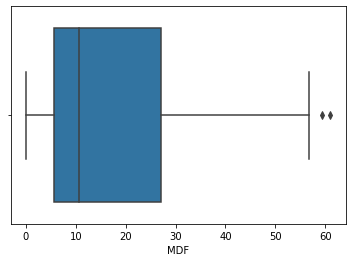

In [32]:
sns.boxplot(x=df_num['MDF'])

In [ ]:
df_num.head

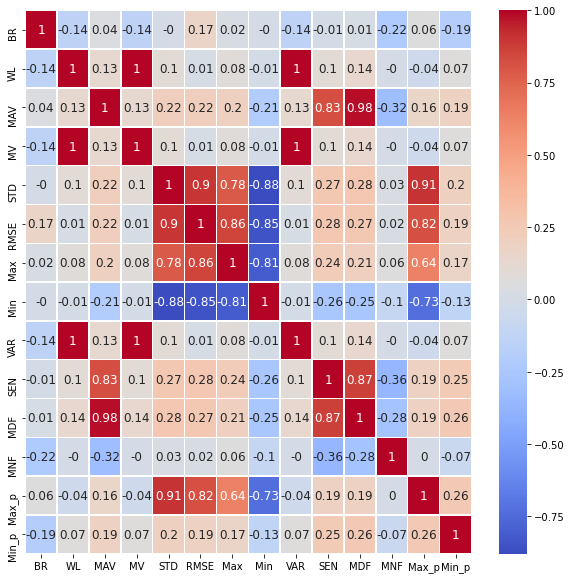

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plot to visualize the correlations in the matrix

plt.figure(figsize = (10,10))
sns.heatmap(data=df_num.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

In [ ]:
#dummy variable for ais position 
dummy = pd.get_dummies(df['r_axis'],drop_first=True)  
dummy

In [ ]:
y=df['target']

In [ ]:

df_num=pd.concat([df_num,dummy, y],axis=1)
df_num

In [ ]:
#df_num=df_num.dropna(axis=0,thresh=12)
df_num=df_num.fillna(np.mean(df_num))
df_num
z=df_num[['y','z','target']]
df_num=df_num.drop(['y','z','target'], axis = 1)


In [ ]:
df_num.head

In [ ]:
print(len(df_num.columns))

In [ ]:
print(df_num.shape)
df.head()

In [ ]:
df_num.hist(figsize=(10,10), bins=30)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_num)
scaled_df = pd.DataFrame(scaler.transform(df_num))
scaled_df.columns = df_num.columns
scaled_df.index=df_num.index
scaled_df.head()



In [ ]:
df_num=scaled_df

In [ ]:
scaled_df.boxplot()

In [ ]:
df_num.hist(figsize=(10,10), bins=30)

PCA ANALYSIS

In [ ]:
df_num.apply(lambda s: df_num.corrwith(s))

In [ ]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)

In [ ]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca.explained_variance_).transpose()

In [ ]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var

In [ ]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

In [ ]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

In [ ]:
pd.DataFrame(pca.components_,columns=scaled_df.columns)


In [ ]:
# Let see the coordinates of the data in the PCA 
df_pca = pd.DataFrame(pca.transform(scaled_df),columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14']
                        ,index=scaled_df.index.values)
df_pca 

In [ ]:
# Let see the coordinates of the data in the PCA 
# The data in the first two PCA 
sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1],
              hue=df['target'], alpha=.3,
              data=df_pca);

## Separate Train set and Test set

In [ ]:
df_num=pd.concat([df_num,z],axis=1)

In [ ]:
y=df['target']
#y

In [ ]:
df_num=df.drop(['target','MAV','BR'], axis = 1)

In [ ]:
x=df_num


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 123) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


## Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,180,10)} 






In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
grid = GridSearchCV(knn, parameters, cv=4, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("accuracy_train: %f using %s" % (gs.best_score_, gs.best_params_))


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
result = confusion_matrix(y_test, y_pred)


print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:”')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

In [ ]:
## EVALUATE THE PREDICTION (ON Y TEST)
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m



In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
## We can try on the train data
y_pred_train=model_knn.predict(X_train)

In [ ]:
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
## f1 train is similar to f1 test--> No overfitting

### Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [2,3,4], 
              'min_samples_split': [5,10,20,100],
              'min_samples_leaf': [2,4,10]} 


In [ ]:
hyperp_search(classifier,parameters)

In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2, min_samples_split=10)

In [ ]:
model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


In [ ]:
## EVALUATE THE PREDICTION (ON Y TEST)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

In [ ]:
## We can try on the train data
y_pred_train=model_tree.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
### Plotting the tree
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=5)
print(r)


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()

In [ ]:
modelNB.fit(X_train, y_train)
y_pred=modelNB.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred, average='macro'))

print("f1_test: ", f1_score(y_test, y_pred, average='macro'))

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


In [ ]:
## We can try on the train data
y_pred_train=modelNB.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10,100],"penalty":['l1','l2'], "max_iter":[1000] }


hyperp_search(classifier,parameters)


In [ ]:
model = LogisticRegression(C=0.0001, penalty='l2', max_iter=1000)

In [ ]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred, average='macro'))

print("f1_test: ", f1_score(y_test, y_pred, average='macro'))



In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
## We can try on the train data
y_pred_train=model.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

### Multi-layer Perceptron Classifier

In [ ]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000,10000], "alpha": [0.001,0.0001]}

hyperp_search(classifier,parameters)


In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.001, max_iter=2000)



In [ ]:
model_MLP.fit(X_train, y_train)
y_pred=model_MLP.predict(X_test)



In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
## We can try on the train data
y_pred_train=model_MLP.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

### SVM

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
model_SVM=SVC(kernel='linear',probability=True)



In [ ]:
model_SVM.fit(X_train, y_train)
y_pred=model_SVM.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
## We can try on the train data
y_pred_train=model_SVM.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred,average='macro')) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

### Random Forest

In [ ]:
parameters = {'n_estimators':np.arange(1,100,20),
              'criterion': ['entropy','gini'], 
              'max_depth': np.arange(1,40,20), 
              'min_samples_split': np.arange(1,40,10),
              'min_samples_leaf': np.arange(1,40,10)} 



In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
hyperp_search(classifier,parameters)

In [ ]:
model_RF=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=5, min_samples_split=20, min_samples_leaf=2)

In [ ]:
model_RF.fit(X_train, y_train)
y_pred=model_RF.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
## We can try on the train data
y_pred_train=model_RF.predict(X_train)
metrics.f1_score(y_train, y_pred_train, average='macro')

In [ ]:
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro')) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred, average='macro'))# tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='macro')) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m